In [11]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import nltk
from nltk.corpus import stopwords
import seaborn as sns 
import string
from sklearn.model_selection import train_test_split
import re
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from nltk.stem import WordNetLemmatizer #word stemmer class
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
lemma = WordNetLemmatizer()
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline

In [12]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [13]:
print(train.shape)
print(test.shape)

(3235, 6)
(1387, 5)


In [14]:
train.head()

,id,original_text,lang,retweet_count,original_author,sentiment_class
0,1.245025e+18,Happy #MothersDay to all you amazing mothers o...,en,0,BeenXXPired,0
1,1.245759e+18,Happy Mothers Day Mum - I'm sorry I can't be t...,en,1,FestiveFeeling,0
2,1.246087e+18,Happy mothers day To all This doing a mothers ...,en,0,KrisAllenSak,-1
3,1.244803e+18,Happy mothers day to this beautiful woman...ro...,en,0,Queenuchee,0
4,1.244876e+18,Remembering the 3 most amazing ladies who made...,en,0,brittan17446794,-1


In [15]:
df_positive = train[train['sentiment_class']==0].reset_index()
df_neutral = train[train['sentiment_class']==1].reset_index()
df_negative = train[train['sentiment_class']==-1].reset_index()

In [16]:
df_negative['original_text'][5]

"Happy Mothers Day ! 's To all those special Mum's who may not have seen their loved one's today. We Love you. Stay Safe. pic.twitter.com/OAm32PTpzO"

In [17]:
train['word_count']   = train['original_text'].apply(len)

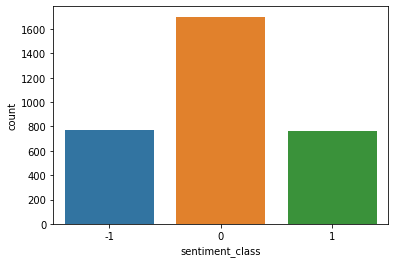

In [18]:
sns.countplot('sentiment_class',data=train)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ECA77EA860>,
      dtype=object)

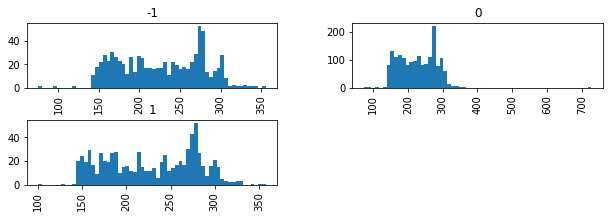

In [19]:
train.hist(column ='word_count',by='sentiment_class',grid=True,bins=60,figsize=(10,3))

# Text Processing

In [20]:
def lower_case(df):
    df['original_text'] = df['original_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
    
lower_case(train)
lower_case(test)

In [21]:
freq = pd.Series(' '.join(train['original_text']).split()).value_counts()[:20]
freq = list(freq.index)
freq


['to',
 'happy',
 'day',
 'the',
 'and',
 'mothers',
 'you',
 'all',
 'a',
 '#mothersday',
 'my',
 '…',
 'of',
 'i',
 'for',
 'in',
 'we',
 'https://www.',
 '.',
 'love']

In [22]:
rare = pd.Series(' '.join(train['original_text']).split()).value_counts()[-20:]
rare =  list(rare.index)
rare

['tus/1241708889608990720',
 'asylum',
 'flip',
 'friendos',
 'deciding',
 'pic.twitter.com/uikexnlmfw',
 'alright)',
 '#lashlift',
 '#ivankaye',
 '#postnatalfitness',
 'pic.twitter.com/yihlfeyylu',
 'village!',
 '#teastartsandtails',
 'suitably',
 '@flitwick',
 'pic.twitter.com/nrdcanmp7n',
 'emotional.',
 'pic.twitter.com/kwiwgqnoij',
 'pic.twitter.com/8zfy9cgomm',
 'reinforced']

In [23]:
def text_process(word2):
    #remove links
    #word2 =(re.sub(r'pic\S+',' ', word2))
    #word2 =re.sub(r'http\S+',' ', word2)
    #word2 =(re.sub(r'instagram\S+',' ', word2))
    word2 = word2.split("pic", 1)[0]
    word2 = word2.split("https", 1)[0]
    word2 = word2.split("instagram", 1)[0]
    
    #stemming
    #word2 = ([stemmer.stem(word) for word in word2.split()])
    #word2 = " ".join(word2)

    # lemma fix
    #word_list = nltk.word_tokenize(word2)
    #word2 = ' '.join([lemma.lemmatize(w) for w in word_list])
    
    #remove words that start with #
    #word2 = [word for word in word2.split() if word[0]!='#' ]
    #word2 = " ".join(word2)
   
    # remove special chars
    word2 = (re.sub(r'\W+',' ', word2))

    #remove stopwords
    word2 = [word for word in word2.split() if word.lower() not in stopwords.words('english')]
    word2 = " ".join(word2)
    
    
    
    #remove xxxx string
    word2 = [word for word in word2.split() if word[0]!='x' and word[len(word)-1]!='x' ]
    word2 = " ".join(word2)


    #remove freq words
    
    #word2 =[word for word in word2.split() if word.lower() not in freq]
    #word2 = ' '.join(word2)
    
    #remove rare words
    word2 =[word for word in word2.split() if word.lower() not in rare]
    word2 = ' '.join(word2)

    #remove digits
    word2 =re.sub(r"\d", "", word2)
    
    #remove single words
    word2 = re.sub(r'\s+[a-zA-Z]\s+',' ', word2)
    
    
    
    #remove extra whtespace
    word2 = (re.sub(r'\s+',' ', word2))

    return word2


In [24]:
train['original_text']=train['original_text'].apply(text_process)

In [25]:
train['original_text']

0       happy mothersday amazing mothers know hard abl...
1       happy mothers day mum sorry bring mothers day ...
2       happy mothers day mothers days work today quie...
3       happy mothers day beautiful woman royalty soot...
4       remembering amazing ladies made late grandmoth...
5       happy mother day bratz world familiez yasmin m...
6       happy mother day wonderful mums mothersday cup...
7       show mother two sexy rosie happy mothers day b...
8       mothers grandmothers aunts sisters women lives...
9       mothers around world gas health initiative wis...
10      happy mothers day mothers around word mothersd...
11      happy mothers day christine daily life full vi...
12      happy mother day check latest blog http sallyc...
13      happy mothers day everyone tuning th round gam...
14      happy mother day got playdoh worm cake beloved...
15      happy mothers day amazing mums keep awesome pr...
16      poem written wife mother day happy mother day ...
17      happy 

# Train Data

In [26]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
#cv = CountVectorizer()
#tfidf = TfidfVectorizer()
#vectorizer = cv.fit(train['original_text'])

In [27]:
#train data
vectorizer = TfidfVectorizer()
# tokenize and build vocab
vectorizer.fit(train['original_text'])
# summarize
#print(vectorizer.vocabulary_)
#print(vectorizer.idf_)
# encode document
#vector = vectorizer.transform(train['original_text'])
# summarize encoded vector
#print(vector.shape)
#print(vector.toarray())

TfidfVectorizer()

In [28]:
#train trst split
X1=vectorizer.transform(train['original_text'])
y=train['sentiment_class']
X1_train, X1_test, y_train, y_test = train_test_split( X1, y, test_size=0.60, random_state=42)

In [29]:
from sklearn.linear_model import LogisticRegression
classifier2 = LogisticRegression(C=10)
classifier2.fit(X1_train, y_train)

C:\Users\Raghav\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=10)

In [30]:
predict2 = classifier2.predict(X1_test)
print(classification_report(y_test,predict2))
print(confusion_matrix(y_test,predict2))
print(accuracy_score(y_test,predict2))

              precision    recall  f1-score   support

          -1       0.28      0.11      0.16       470
           0       0.52      0.80      0.63      1007
           1       0.26      0.11      0.16       464

    accuracy                           0.47      1941
   macro avg       0.35      0.34      0.32      1941
weighted avg       0.40      0.47      0.40      1941

[[ 53 371  46]
 [ 95 807 105]
 [ 38 374  52]]
0.46986089644513135


# Test Data

In [31]:
test['original_text']=test['original_text'].apply(text_process)

In [32]:
test['original_text']

0        yeah cooked potatoes years old mean threw bag...
1       happy mother day mums step mums grandmothers d...
2       love people uk however awoke saw mothersday tr...
3       happy st birthday happy mother day mum see tod...
4       happy mothers day wonderful mothers world live...
5       happy mother day thanks support mother daughte...
6       happy sunday ruth happy mothers day lovely pea...
7       happy mothers day amazing mom care love childr...
8       happy mothers day mum many could visit phone s...
9       happy mothering sunday afternoon bed new book ...
10      happy mothers day mums step mums foster mums c...
11      happy mother day another mother still referrin...
12      happy mothers day fantastic garden plant blue ...
13      momma passed years ago terrible cancer mothers...
14      happy mothers day even remain heart forever lo...
15      happy mothersday mary yes call first name than...
16      mothers stepmothers grandmothers great grandmo...
17      today 

In [33]:
processed_test = vectorizer.transform(test['original_text'])

In [34]:
final = classifier2.predict(processed_test)

In [35]:
submission = pd.DataFrame({'id':test['id'],'sentiment_class':final})

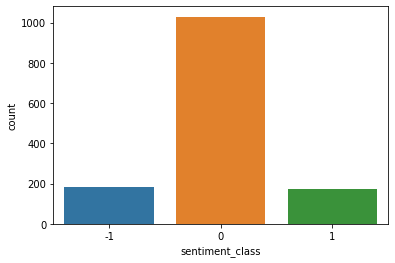

In [36]:
sns.countplot(submission['sentiment_class'])

In [37]:
filename = 'submission1.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: submission1.csv
